In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
from sklearn.datasets import fetch_openml
car_data = fetch_openml(name='car',version=2,parser='auto')

In [33]:
type(car_data)

sklearn.utils._bunch.Bunch

In [34]:
car_data.details

{'id': '991',
 'name': 'car',
 'version': '2',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2014-10-04T22:44:31',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/53525/car.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'file_id': '53525',
 'default_target_attribute': 'binaryClass',
 'tag': ['Chemistry',
  'derived',
  'Life Science',
  'mythbusting_1',
  'study_1',
  'study_15',
  'study_20',
  'study_41',
  'study_7'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:17:54',
 'md5_checksum': '49c57b793eef1b8e55f297e5e019fdbf'}

In [35]:
car_data.details['version']

'2'

In [36]:
print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [37]:
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [38]:
car_data = car_data.frame
car_data.head()


,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [39]:
type(car_data)

pandas.core.frame.DataFrame

In [40]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(car_data, test_size=0.3,random_state=20)
print('the size of training data is: {}\n the size of testing data is {}'. format(len(train_data),len(test_data)))

the size of training data is: 1209
 the size of testing data is 519


In [41]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1209,1209,1209,1209,1209,1209,1209
unique,4,4,4,3,3,3,2
top,med,high,5more,more,big,med,P
freq,327,311,319,418,411,406,849


In [42]:
train_data.isnull().sum()

buying         0
maint          0
doors          0
persons        0
lug_boot       0
safety         0
binaryClass    0
dtype: int64

In [43]:
train_data['buying'].value_counts()

buying
med      327
high     307
vhigh    291
low      284
Name: count, dtype: int64

In [45]:
train_data['maint'].value_counts()

maint
high     311
med      311
vhigh    294
low      293
Name: count, dtype: int64

In [46]:
train_data['doors'].value_counts()

doors
5more    319
2        312
4        296
3        282
Name: count, dtype: int64

In [47]:
train_data['persons'].value_counts()

persons
more    418
2       407
4       384
Name: count, dtype: int64

<Axes: xlabel='buying', ylabel='count'>

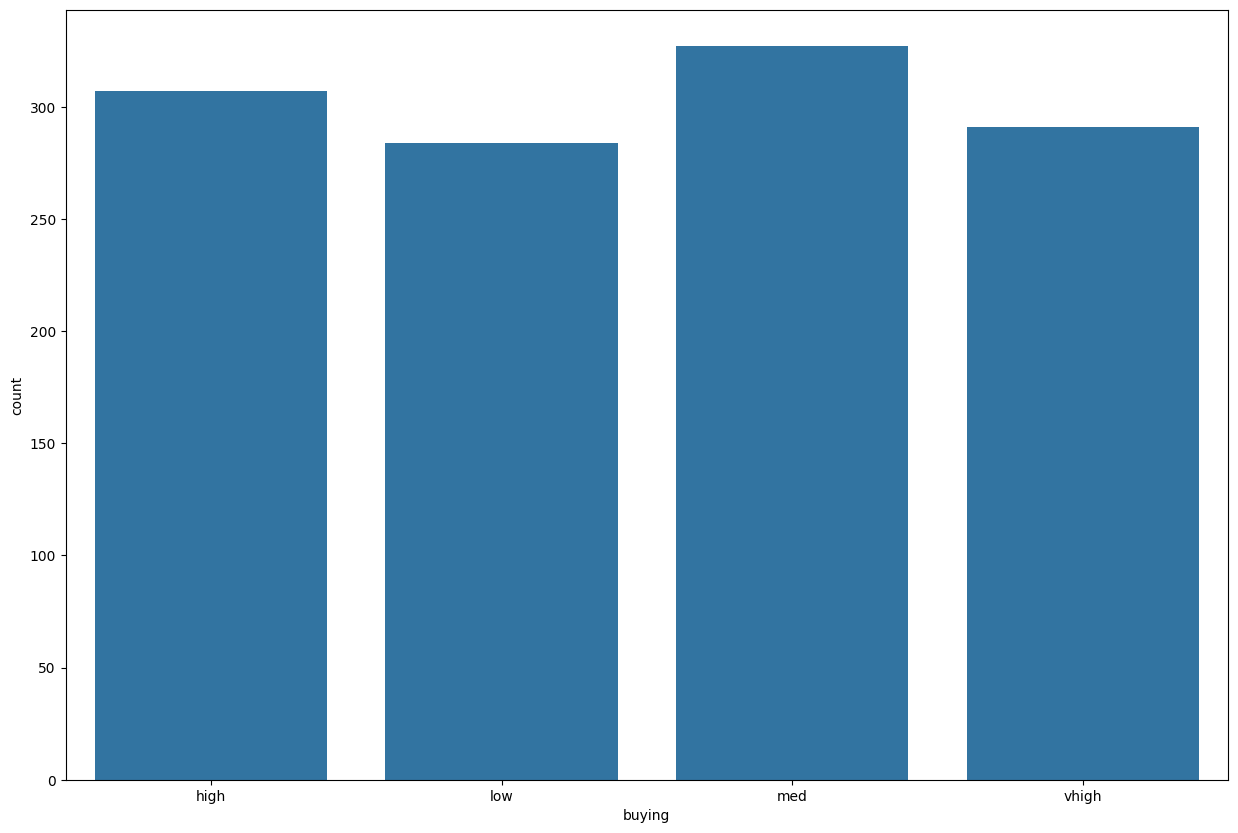

In [48]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying')

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data)